In [2]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

<ipython-input-4-43f55fb0d9cb>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [6]:
df.head()

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Avg Burst Time,Total Completion Time,Number of processes
0,0,2,10.777778,13.000000,117,9
1,1,3,10.500000,12.500000,75,6
2,2,7,8.000000,16.200000,81,5
3,3,3,11.500000,7.500000,30,4
4,4,9,10.000000,15.333333,46,3


#EDA

In [7]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
X = df.drop(['Optimum Time quantum', 'Unnamed: 0'], axis = 'columns')
y = df['Optimum Time quantum']

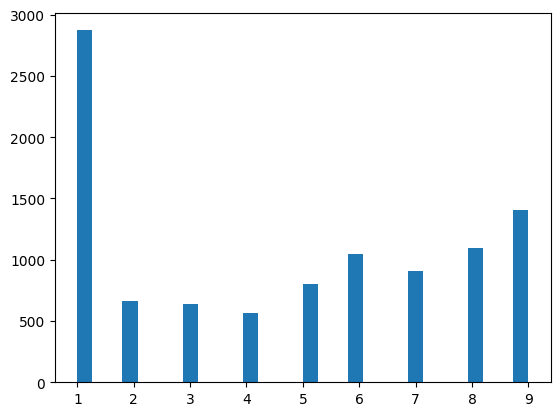

In [9]:
plt.hist(df["Optimum Time quantum"], bins = 30)
plt.show()

In [10]:
X.head()

,Avg Arrival Time,Avg Burst Time,Total Completion Time,Number of processes
0,10.777778,13.000000,117,9
1,10.500000,12.500000,75,6
2,8.000000,16.200000,81,5
3,11.500000,7.500000,30,4
4,10.000000,15.333333,46,3


In [11]:
y.head()

0    2
1    3
2    7
3    3
4    9
Name: Optimum Time quantum, dtype: int64

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Size and shape of X_train respectively are",X_train.size,"and",X_train.shape)
print("Size and shape of X_test respectively are",X_test.size,"and",X_test.shape)
print("Size and shape of y_train respectively are",y_train.size,"and",y_train.shape)
print("Size and shape of y_test respectively are",y_test.size,"and",y_test.shape)

Size and shape of X_train respectively are 28000 and (7000, 4)
Size and shape of X_test respectively are 12000 and (3000, 4)
Size and shape of y_train respectively are 7000 and (7000,)
Size and shape of y_test respectively are 3000 and (3000,)


#Linear Regression

In [13]:
lm=LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
predictions=lm.predict(X_test)

In [16]:
predictions

array([3.64748536, 6.23043407, 4.56691351, ..., 4.74212746, 3.80689642,
       4.38305571])

In [17]:
y_test

6252    5
4684    8
1731    1
4742    8
4521    9
       ..
8014    7
1074    1
3063    7
6487    1
4705    1
Name: Optimum Time quantum, Length: 3000, dtype: int64

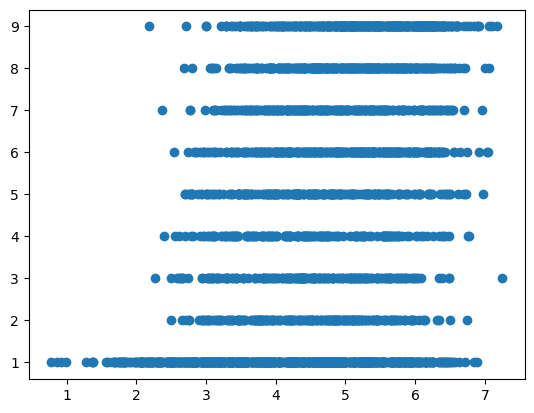

In [18]:
plt.scatter(predictions,y_test)
plt.show()

In [19]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.122
MAE =  2.447
MSE =  7.887
RMSE =  2.808


#Ridge Regression

In [20]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [21]:
predictions = ridge.predict(X_test)

In [22]:
predictions

array([3.64748546, 6.23042502, 4.56689481, ..., 4.74212723, 3.80689941,
       4.38303221])

In [23]:
y_test

6252    5
4684    8
1731    1
4742    8
4521    9
       ..
8014    7
1074    1
3063    7
6487    1
4705    1
Name: Optimum Time quantum, Length: 3000, dtype: int64

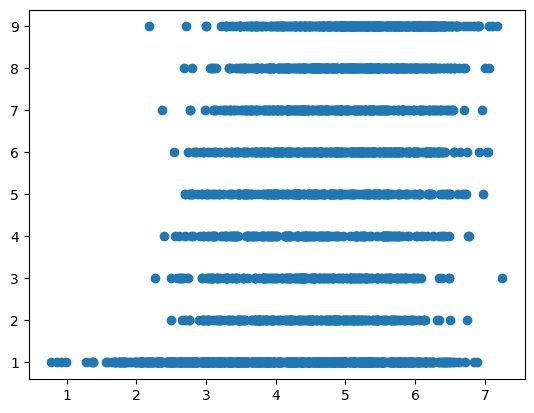

In [24]:
plt.scatter(predictions,y_test)
plt.show()

In [25]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.122
MAE =  2.447
MSE =  7.887
RMSE =  2.808


#Lasso Regression

In [26]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [27]:
predictions = lasso.predict(X_test)
predictions

array([3.64676253, 6.02478239, 4.23367548, ..., 4.72915815, 3.86474464,
       3.91619149])

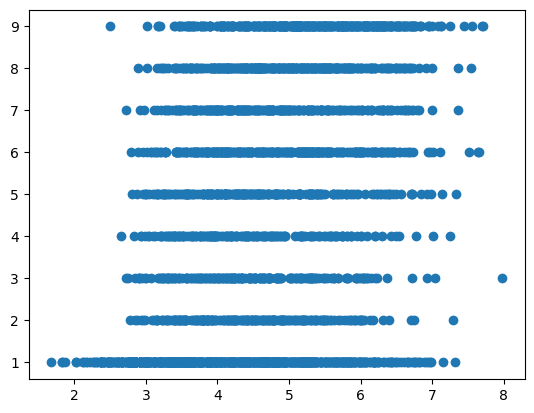

In [28]:
plt.scatter(predictions,y_test)
plt.show()

In [29]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.12
MAE =  2.463
MSE =  7.904
RMSE =  2.811


#Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly_reg = PolynomialFeatures(degree = 4)

In [50]:
X_polynomial = poly_reg.fit_transform(X_train)

In [51]:
lreg = LinearRegression()  
lreg.fit(X_polynomial, y_train)  

LinearRegression()

In [52]:
predictions = lreg.predict(poly_reg.fit_transform(X_test))
predictions

array([4.04430584, 5.90200614, 4.84245405, ..., 5.00959014, 4.45145233,
       4.29714208])

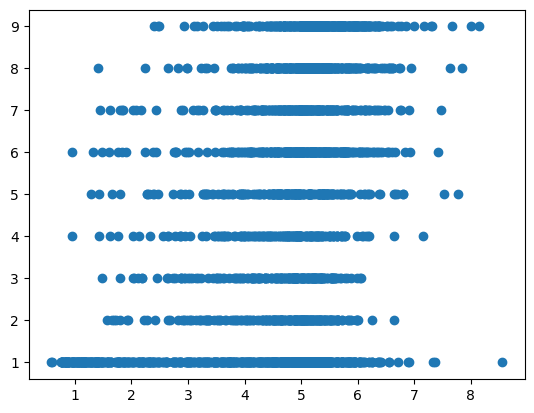

In [53]:
plt.scatter(predictions,y_test)
plt.show()

In [54]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.159
MAE =  2.345
MSE =  7.553
RMSE =  2.748
